In [4]:
# Pick a player
# Get the games for that player
# Figure out a simple resampling scheme (don't need weights for now)
# Use the resampled data to fit a multivariate kernel density estimate using scipy
# Come up with a pdf.
# pretend same for some reason
# player = 'Stephen Curry'

In [1]:
import psycopg2
import pandas as pd 
from scipy import stats
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# https://kdepy.readthedocs.io/en/latest/examples.html

In [2]:
# Connect to postgres db
try:
    conn = psycopg2.connect(
        dbname='sports_data',
        user='postgres',
        password='postgres',
        host='localhost',
        port='5432'
    )
except:
    print("Failure to connect to database.")

query = '''
        SELECT * FROM basketball.stat_sheet ss
        '''

data = pd.read_sql_query(query, conn)

# Close the cursor and connection
conn.close()

C:\Users\14086\AppData\Local\Temp\ipykernel_11956\103126865.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [4]:
data['last_played_opp'] = data ['opponent'].apply(lambda x: 1 if x != 'MIA' else 2) 
weights = data['last_played_opp'].values
mat = np.matrix(data[['points', 'total_rebounds', 'assists']])
cov = np.cov(mat, rowvar=False)
mean = np.mean(mat, axis=0)

In [5]:
# Fit KDE with weighted samples
kde = KernelDensity(kernel='gaussian').fit(np.asarray(mat), sample_weight=weights)

In [7]:
data

,player,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,three_pointers,three_pointers_attempted,three_pointer_percentage,free_throws,free_throws_attempted,...,plus_minus,team,opponent,visitor,home,date,player_id,game_id,created_at,last_played_opp
0,Zion Williamson,0 days 00:38:18,11,20,0.550,0,1,0.000,10,15,...,-13,NOP,MIA,NOP,MIA,2020-12-25,91b8cfb873b55b5c79966ed8aa30ccfc,39d6c810cdcc41e57742703d08b89499,2024-04-06 09:30:42.433543,2
1,Brandon Ingram,0 days 00:37:03,7,17,0.412,4,8,0.500,10,11,...,2,NOP,MIA,NOP,MIA,2020-12-25,d41e779b3625fcdb19c3c949346797eb,39d6c810cdcc41e57742703d08b89499,2024-04-06 09:30:42.433543,2
2,Lonzo Ball,0 days 00:33:26,2,8,0.250,2,8,0.250,0,0,...,-3,NOP,MIA,NOP,MIA,2020-12-25,f7c7c36952a7cbc3928293056a7446af,39d6c810cdcc41e57742703d08b89499,2024-04-06 09:30:42.433543,2
3,Eric Bledsoe,0 days 00:33:10,2,10,0.200,1,6,0.167,0,0,...,-3,NOP,MIA,NOP,MIA,2020-12-25,e6f8f8d9e72db3ecd675c026cf250747,39d6c810cdcc41e57742703d08b89499,2024-04-06 09:30:42.433543,2
4,Steven Adams,0 days 00:32:22,3,3,1.000,0,0,0.000,0,0,...,5,NOP,MIA,NOP,MIA,2020-12-25,e5f60acf831753b050a5a27a9d25c8b1,39d6c810cdcc41e57742703d08b89499,2024-04-06 09:30:42.433543,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85475,Bojan Bogdanović,0 days 00:24:04,2,8,0.250,1,4,0.250,0,0,...,-23,UTA,TOR,TOR,UTA,2020-03-09,5eb37cd783aae076451247ec942742e7,e755f6fcefff63e34398fe49aae45d31,2024-04-27 10:22:03.344921,1
85476,Joe Ingles,0 days 00:31:48,8,12,0.667,4,8,0.500,0,0,...,-1,UTA,TOR,TOR,UTA,2020-03-09,afeff8552ea92b170ed9c7ea2c1c572b,e755f6fcefff63e34398fe49aae45d31,2024-04-27 10:22:03.344921,1
85477,Jordan Clarkson,0 days 00:23:35,3,9,0.333,1,6,0.167,2,2,...,14,UTA,TOR,TOR,UTA,2020-03-09,03d573a8cbae2ed12f6309b4c57f7cb3,e755f6fcefff63e34398fe49aae45d31,2024-04-27 10:22:03.344921,1
85478,Tony Bradley,0 days 00:15:49,2,3,0.667,0,0,0.000,1,2,...,17,UTA,TOR,TOR,UTA,2020-03-09,bcc851fb71eb164e8d93f6c24edbf4e7,e755f6fcefff63e34398fe49aae45d31,2024-04-27 10:22:03.344921,1


In [8]:
x1_min, x1_max = data['points'].min(), data['points'].max()
x2_min, x2_max = data['total_rebounds'].min(), data['total_rebounds'].max()
x3_min, x3_max = data['assists'].min(), data['assists'].max()

In [9]:
num_points = 10

# Create grids for each dimension
x1_grid = np.linspace(x1_min, x1_max, num_points)
x2_grid = np.linspace(x2_min, x2_max, num_points)
x3_grid = np.linspace(x3_min, x3_max, num_points)

# Create the meshgrid from these grids
x1_mesh, x2_mesh, x3_mesh = np.meshgrid(x1_grid, x2_grid, x3_grid, indexing='ij')


In [10]:
xy_eval = np.column_stack([x1_mesh.ravel(), x2_mesh.ravel(), x3_mesh.ravel()])

# Evaluate the KDE at each point on the grid
log_density = kde.score_samples(xy_eval)

# Reshape the log_density array to match the grid shape
log_density = log_density.reshape(x1_mesh.shape)

ValueError: Argument Z must be 2-dimensional.

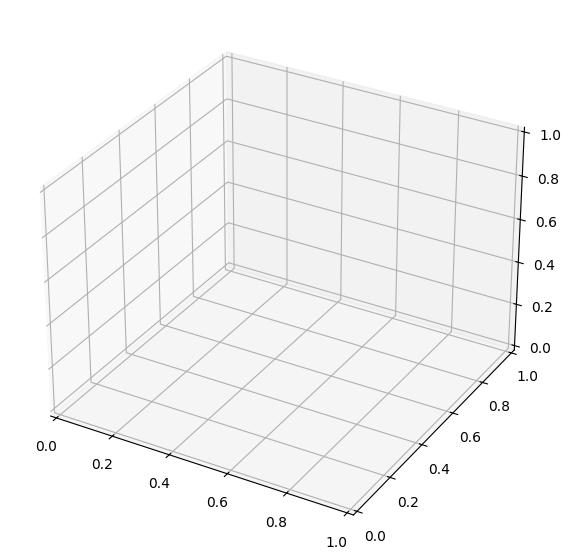

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have already computed log_density using score_samples

# Reshape the log_density array to match the shape of the original meshgrid arrays
log_density_3d = log_density.reshape(x1_mesh.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surface = ax.plot_surface(x1_mesh, x2_mesh, x3_mesh, rstride=1, cstride=1, cmap='viridis', alpha=0.8, facecolors=plt.cm.viridis(log_density_3d), linewidth=0)

# Add color bar
cbar = fig.colorbar(surface)
cbar.set_label('Log Density')

# Set labels and title
ax.set_xlabel('Points')
ax.set_ylabel('Rebounds')
ax.set_zlabel('Assists')
ax.set_title('Estimated Density Surface')

plt.show()

In [15]:
import numpy as np
from scipy import stats
from mayavi import mlab

mu=np.array([1,10,20])
# Let's change this so that the points won't all lie in a plane...
sigma=np.matrix([[20,10,10],
                 [10,25,1],
                 [10,1,50]])

data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)

# Create a regular 3D grid with 50 points in each dimension
xmin, ymin, zmin = data.min(axis=0)
xmax, ymax, zmax = data.max(axis=0)
xi, yi, zi = np.mgrid[xmin:xmax:50j, ymin:ymax:50j, zmin:zmax:50j]

# Evaluate the KDE on a regular grid...
coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
density = kde(coords).reshape(xi.shape)

# Visualize the density estimate as isosurfaces
mlab.contour3d(xi, yi, zi, density, opacity=0.5)
mlab.axes()
mlab.show()

ModuleNotFoundError: No module named 'mayavi'

NameError: name 'mat' is not defined

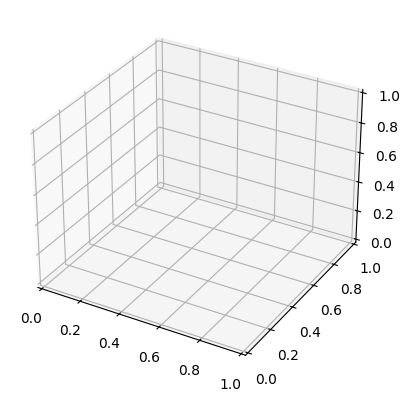

In [ ]:
density = kde(mat.T)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = mat.T
ax.scatter(x, y, z, c=density)
plt.show()

In [10]:
# import numpy as np
# from scipy import stats
# from mayavi import mlab

# mu=np.array([1,10,20])
# # Let's change this so that the points won't all lie in a plane...
# sigma=np.matrix([[20,10,10],
#                  [10,25,1],
#                  [10,1,50]])

# data=np.random.multivariate_normal(mu,sigma,1000)
# values = data.T

# kde = stats.gaussian_kde(values)

# # Create a regular 3D grid with 50 points in each dimension
# xmin, ymin, zmin = data.min(axis=0)
# xmax, ymax, zmax = data.max(axis=0)
# xi, yi, zi = np.mgrid[xmin:xmax:50j, ymin:ymax:50j, zmin:zmax:50j]

# # Evaluate the KDE on a regular grid...
# coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
# density = kde(coords).reshape(xi.shape)

# # Visualize the density estimate as isosurfaces
# mlab.contour3d(xi, yi, zi, density, opacity=0.5)
# mlab.axes()
# mlab.show()

In [29]:
# i have a bunch of features
# how do i fit an ML model

In [ ]:
pdf of loss == generate, get the pprobability of likelihood and seee if statisticalyl significantly worng